# Flight Delay Characteristics for US Flights in 2005

## Investigation Overview
This investigation was focused on the characteristics of flight delays in 2005. The main focus was to determine peak periods of delays throughout the year. 

## Dataset Overview
The data constisted of approximately 7 million US flights. Arrival and departure delays in minutes as well as the delay causes were used from this dataset. Approximately 148,000 records were removed from this data set for having null values for arrival/departure delays.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final outpu
import warnings
warnings.simplefilter("ignore")

In [2]:
# read in data to be used as a midway point. 
df_2005_c = pd.read_csv('input_cleaned/2005_cleaned.csv')
df_2005_c['CarrierDelayCat'] = df_2005_c['CarrierDelayCat'].astype('category')
df_2005_c['WeatherDelayCat'] = df_2005_c['WeatherDelayCat'].astype('category')
df_2005_c['DepDelayCat'] = df_2005_c['DepDelayCat'].astype('category')
df_2005_c['ArrDelayCat'] = df_2005_c['ArrDelayCat'].astype('category')
df_2005_c['NASDelayCat'] = df_2005_c['NASDelayCat'].astype('category')
df_2005_c['SecurityDelayCat'] = df_2005_c['SecurityDelayCat'].astype('category')
df_2005_c['LateAircraftDelayCat'] = df_2005_c['LateAircraftDelayCat'].astype('category')

df_2005_c['DepDelay'] = df_2005_c['DepDelay'].astype('int')
df_2005_c['ArrDelay'] = df_2005_c['ArrDelay'].astype('int')

## Distribution of Total Flights
Overall flight distribution for each month. Flights range from around 534,000 at the lowest month, up to 615,000 at the highest peak. This provides a difference of approximately 80,000 flights.

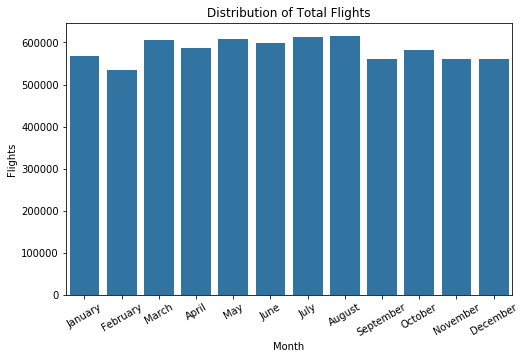

In [37]:
base_color = sb.color_palette()[0]          
fig, ax = plt.subplots(figsize=(8,5))
p = sb.countplot(data=df_2005_c, x='Month',  color = base_color)
p.set(xticklabels=['January','February','March','April','May','June','July','August','September','October','November','December'])
plt.xticks(rotation=30)
plt.title('Distribution of Total Flights')
plt.xlabel('Month')
plt.ylabel('Flights');

In [5]:
df_2005_c.groupby(['Month'])['Month'].count()

Month
1     568031
2     534959
3     606489
4     586179
5     608046
6     597856
7     612107
8     615643
9     561905
10    581513
11    559625
12    560485
Name: Month, dtype: int64

## Departure Delay Status by Month
Departure delay measures whether a flight takes off at its appointed time. We are interested in the Late status for flights. There is a 102,000 plus difference between the July (worst) and September (best). Delay's can be any number of related reason such as weather, security, carrier, etc.

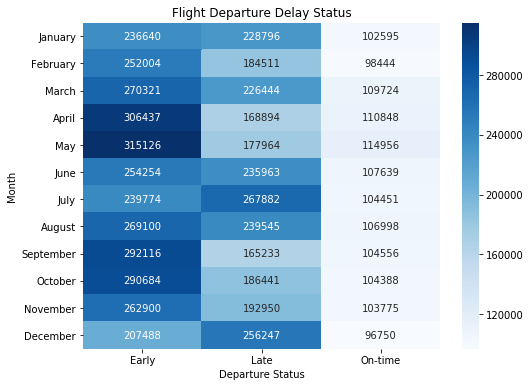

In [83]:
# heatmap version of the barchart above
plt.figure(figsize = [8,6])

dep_counts = df_2005_c.groupby(['Month','DepDelayCat']).size()
dep_counts = dep_counts.reset_index(name = 'count')
dep_counts = dep_counts.pivot(index = 'Month', columns = 'DepDelayCat', values = 'count')
p = sb.heatmap(dep_counts, annot=True, fmt='d', cmap='Blues')

p.set(yticklabels=['January','February','March','April','May','June','July','August','September','October','November','December'])
plt.yticks(rotation=0)
plt.title('Flight Departure Delay Status by Month')
plt.xlabel('Departure Status')
plt.ylabel('Month');


## Arrival Delay Status by Month
Arrival delay measures whether a flight takes off at its appointed time. We are interested in the Late status for flights. There is a 91,000 plus difference between the July (worst) and September (best). Overall arrival delays increased over the departure delays. Once a flight has taken off it is subject to delays caused by the National Airspace System (NAS). Thes can include non-extreme weather, heavy traffic, air traffic control, etc.


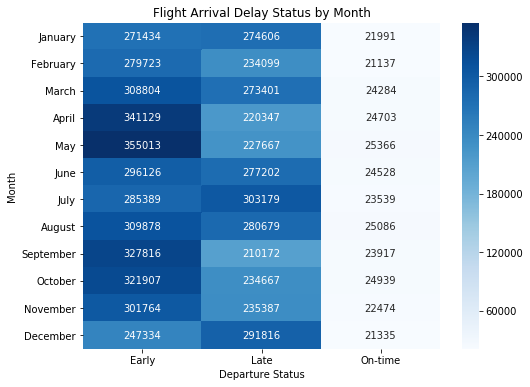

In [84]:
# heatmap version of the barchart above
plt.figure(figsize = [8,6])

arr_counts = df_2005_c.groupby(['Month','ArrDelayCat']).size()
arr_counts = arr_counts.reset_index(name = 'count')
arr_counts = arr_counts.pivot(index = 'Month', columns = 'ArrDelayCat', values = 'count')
p = sb.heatmap(arr_counts, annot=True, fmt='d', cmap='Blues');

p.set(yticklabels=['January','February','March','April','May','June','July','August','September','October','November','December'])
plt.yticks(rotation=0)
plt.title('Flight Arrival Delay Status by Month')
plt.xlabel('Departure Status')
plt.ylabel('Month');

## Delay Totals by Week/Month
There is a relationship with the periods of heavy delays and the specific months they occur. June, July, and August see the heaviest delays on every day of the week which is consitent with summer vacations. Thursday and Friday's in December are also consistent with vacations. We can also see Saturday's as a slower travel day as people prefer to leave/arrive on Friday or Sunday. Overall, April and September appear to be the best months to travel with lower counts of delays.

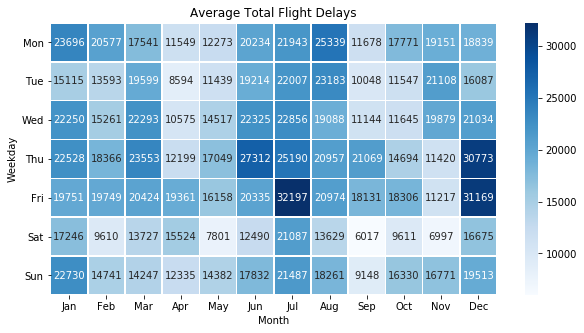

In [85]:
# overall count of delays for the year
plt.figure(figsize = [10,5])
sumcounts = df_2005_c.groupby(['Month', 'DayOfWeek']).sum()['OverallDelayCat']
sumcounts = sumcounts.reset_index(name = 'count')
sumcounts = sumcounts.pivot(index = 'DayOfWeek', columns = 'Month', values = 'count')
p = sb.heatmap(sumcounts, linewidths=.5, cmap='Blues', annot=True, fmt='.0f');
p.set(xticklabels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.xticks(rotation=0)
p.set(yticklabels=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
plt.yticks(rotation=0)
plt.title('Total Flight Delays')
plt.xlabel('Month')
plt.ylabel('Weekday');

In [86]:
# overall average for departure delay
df_2005_c.query('DepDelay > 0')['DepDelay'].mean()
df_2005_c.query('ArrDelay > 0')['ArrDelay'].mean()

28.321059655486934

## Average NAS Flight Delays by Week/Month
National Airspace System (NAS) delays are typically indicated after a flight has left the gate. These can be heavy traffic, air traffic control or many other reason. We see that this follows the overall pattern of delays and peaking in the month of July. On average a NAS delay is 27 minutes. With the highest at 39 minutes and lowest at 18 minutes we have a 21 minute difference.

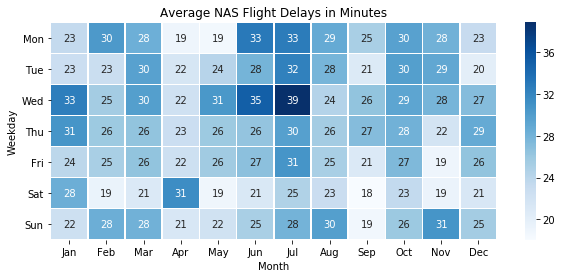

In [76]:
# average nas delay for year
plt.figure(figsize = [10,4])
counts = df_2005_c.query('NASDelayCat == 1').groupby(['Month', 'DayOfWeek']).mean()['NASDelay']
counts = counts.reset_index(name = 'count')
counts = counts.pivot(index = 'DayOfWeek', columns = 'Month', values = 'count')
p = sb.heatmap(counts, linewidths=.5, cmap='Blues', annot=True, fmt='.0f');
p.set(xticklabels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.xticks(rotation=0)
p.set(yticklabels=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
plt.yticks(rotation=0)
plt.title('Average NAS Flight Delays in Minutes')
plt.xlabel('Month')
plt.ylabel('Weekday');

## Average Carrier Flight Delays by Week/Month
Carrier delays are typically attributed to delays caused by the carrier for missing departure time. These can be fueling, servicing, boarding, stowing baggage, or many other reasons. This type of delay breaks with the overall delay pattern. With the highest delay at 39 minutes and the lowest at 27 minutes, we have a 12 minute difference. With this smaller difference the carrier delays are more uniform across the year. July is high due to the flight volume, however Saturday is consistently the highest despite having the lowest overall delay counts.

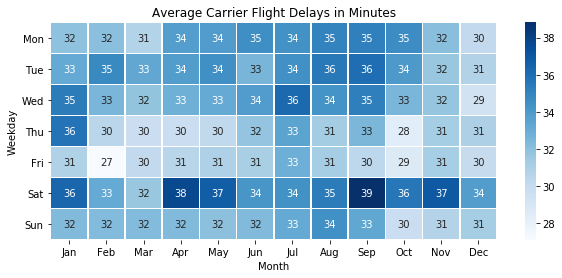

In [77]:
# average carrier delay for year
plt.figure(figsize = [10,4])
counts = df_2005_c.query('CarrierDelayCat == 1').groupby(['Month', 'DayOfWeek']).mean()['CarrierDelay']
counts = counts.reset_index(name = 'count')
counts = counts.pivot(index = 'DayOfWeek', columns = 'Month', values = 'count')
p = sb.heatmap(counts, linewidths=.5, cmap='Blues', annot=True, fmt='.0f');
p.set(xticklabels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.xticks(rotation=0)
p.set(yticklabels=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
plt.yticks(rotation=0)
plt.title('Average Carrier Flight Delays in Minutes')
plt.xlabel('Month')
plt.ylabel('Weekday');

## Average Late Aircraft Flight Delays by Week/Month
Late aircraft delays are caused by delays in the arrival aircraft. Here we have an overall difference of 30 minutes.

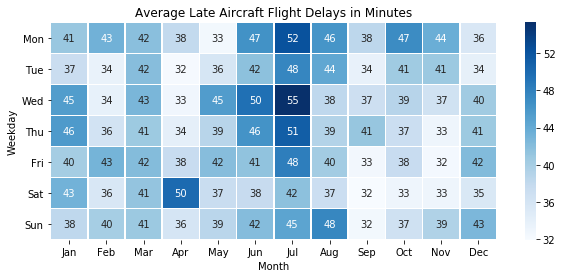

In [78]:
# average late aircraft delay for year
plt.figure(figsize = [10,4])
counts = df_2005_c.query('LateAircraftDelayCat == 1').groupby(['Month', 'DayOfWeek']).mean()['LateAircraftDelay']
counts = counts.reset_index(name = 'count')
counts = counts.pivot(index = 'DayOfWeek', columns = 'Month', values = 'count')
p = sb.heatmap(counts, linewidths=.5, cmap='Blues', annot=True, fmt='.0f');
p.set(xticklabels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.xticks(rotation=0)
p.set(yticklabels=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
plt.yticks(rotation=0)
plt.title('Average Late Aircraft Flight Delays in Minutes')
plt.xlabel('Month')
plt.ylabel('Weekday');

## Average Weather Flight Delays by Week/Month

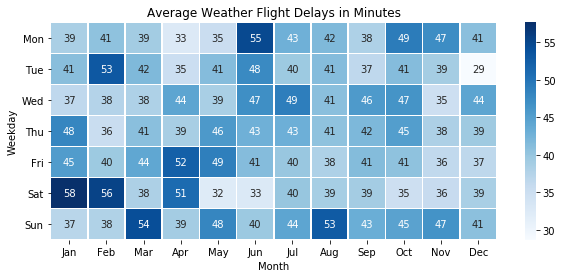

In [79]:
# average weather delay for year
plt.figure(figsize = [10,4])
counts = df_2005_c.query('WeatherDelayCat == 1').groupby(['Month', 'DayOfWeek']).mean()['WeatherDelay']
counts = counts.reset_index(name = 'count')
counts = counts.pivot(index = 'DayOfWeek', columns = 'Month', values = 'count')
p = sb.heatmap(counts, linewidths=.5, cmap='Blues', annot=True, fmt='.0f');
p.set(xticklabels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.xticks(rotation=0)
p.set(yticklabels=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
plt.yticks(rotation=0)
plt.title('Average Weather Flight Delays in Minutes')
plt.xlabel('Month')
plt.ylabel('Weekday');

## Average Security Flight Delays by Week/Month

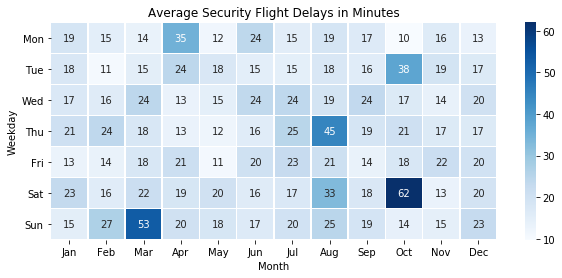

In [80]:
# average security delay for year
plt.figure(figsize = [10,4])
counts = df_2005_c.query('SecurityDelayCat == 1').groupby(['Month', 'DayOfWeek']).mean()['SecurityDelay']
counts = counts.reset_index(name = 'count')
counts = counts.pivot(index = 'DayOfWeek', columns = 'Month', values = 'count')
p = sb.heatmap(counts, linewidths=.5, cmap='Blues', annot=True, fmt='.0f');
p.set(xticklabels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.xticks(rotation=0)
p.set(yticklabels=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
plt.yticks(rotation=0)
plt.title('Average Security Flight Delays in Minutes')
plt.xlabel('Month')
plt.ylabel('Weekday');

In [81]:
# mean delays for the specifc delay type
print('NASDelay  ' + str(df_2005_c.query('NASDelayCat == 1')['NASDelay'].mean()))
print('CarrierDelay  ' + str(df_2005_c.query('CarrierDelayCat == 1')['CarrierDelay'].mean()))
print('LateAircraftDelay  ' + str(df_2005_c.query('LateAircraftDelayCat == 1')['LateAircraftDelay'].mean()))
print('WeatherDelay  ' + str(df_2005_c.query('WeatherDelayCat == 1')['WeatherDelay'].mean()))
print('SecurityDelay  ' + str(df_2005_c.query('SecurityDelayCat == 1')['SecurityDelay'].mean()))

NASDelay  26.80078130224471
CarrierDelay  32.55502668397519
LateAircraftDelay  41.4578900821626
WeatherDelay  42.318651919416816
SecurityDelay  21.28338614757809
